<a href="https://colab.research.google.com/github/edgardpitta/jopper/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity

1. In the Runtime/Environnement d'execution menu item, click 'Run all'. This can take some time as it prepares your environment for the script to run.

2. When prompted, paste your pitch into the text field and the script will run automatically.

3. Analyze your wordcloud:
- Can you see your top keywords in the wordcloud?

4. Analyze your sentiment analysis scores:
- Make sure your Polarity is at least positive (greater than 0.5) and your Subjective is high (greater than 0.5).
- Do you have a good amount of positive words?
- Does it make sense to eliminate negative words, if any?
- Do you have excessive neutral/stop words?

5. Analyze the Natural Language Processing - NLP section:
- Do you have a good number of non-stopwords adjectives?
- Do you have a good number of non-stopwords and high quality verbs?
- Do you have more than 60% non-stopwords in total?

6. Be sure to rewrite your pitch to reflect the desired changes and re-run the script as many times you want. For doing so, select the cell 'Pitch' and click 'Ctrl+F10' or in the menu item Runtime/Environnement d'exécution, choose Run After/Courir Après. Paste the revised version of your pitch and press 'Enter'. The script will then re-run to reflect the changes in the pitch.

7. Print the page as a PDF and upload it to K2. This is a graded activity and **you will not be graded if the activity is not loaded into K2**.

[Click here to download these instructions.](https://skema-my.sharepoint.com/:b:/g/personal/edgard_pitta-ext_skema_edu/EYq5MxEG67xKptc7h8u1SjoBQQ1W02g2B6UN6phwZPcBcA?e=ZV8bgs)

In [43]:
#@title Imports & Functions - Run only once {display-mode: "form"}
 
# Do not change it.

# Installs
%%capture
!pip install pandas 
!pip install numpy
!pip install textblob 
!pip install altair 
!pip install vaderSentiment
!pip install vega
!pip install wordcloud
!pip install spacy
!pip install neattext
!pip install matplotlib

# Imports
from textblob import TextBlob
import pandas as pd
import altair as alt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import data_table
from wordcloud import WordCloud, STOPWORDS
import spacy
nlp = spacy.load('en_core_web_sm')
import neattext as nfx
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
data_table.enable_dataframe_formatter()
alt.renderers.enable('default')

# Functions
def convert_to_df(sentiment):
	sentiment_dict = {'polarity':sentiment.polarity,'subjectivity':sentiment.subjectivity}
	sentiment_df = pd.DataFrame(sentiment_dict.items(),columns=['metric','value'])
	return sentiment_df 

def analyze_token_sentiment(docx):
	analyzer = SentimentIntensityAnalyzer()
	pos_list = []
	neg_list = []
	neu_list = []
	for i in docx.split():
		res = analyzer.polarity_scores(i)['compound']
		if res > 0.1:
			pos_list.append(i)
			pos_list.append(res)

		elif res <= -0.1:
			neg_list.append(i)
			neg_list.append(res)
		else:
			neu_list.append(i)

	result = {'positives':pos_list,'negatives':neg_list,'neutral':neu_list}
	return result 

def text_analyzer(my_text):
	docx = nlp(my_text)
	allData = [(token.text, token.shape_, token.pos_, token.tag_, token.lemma_,token.is_alpha, token.is_stop) for token in docx]
	df_tokens = pd.DataFrame(allData, columns=['Token', 'Shape', 'PoS', 'Tag', 'Lemma', 'IsAlpha', 'IsStopWords'])
	return df_tokens

def text_cleaner(my_text):
	stpw = nfx(my_text)
	stpw = stpw.lower().remove_stopwords().remove_numbers().remove_punctuations().remove_special_characters()
	return stpw

def plot_wordcloud(docx):
	my_wordcloud = WordCloud(background_color="white").generate(docx)
	fig = plt.figure()
	plt.imshow(my_wordcloud, interpolation='bilinear')
	plt.axis('off')
 
 # Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["thanks", "little", "Hi", "Hello", "School", "city", "name", "time", "semester", "tell", "work", "lots", "glad", "meet", "morning", "afternoon", "field", "will", "looking", ])


## 1. Paste your pitch in the field below and press Enter


In [44]:
#@title Pitch {display-mode: "form"}
raw_text = input() 



I'm I'm in ASCII master, one student of schema as of next September I will enter an apprenticeship course in audit in order to obtain my Masters degree in audit and Finance and that the reason why I'm looking to join your company today. I am passionate about finance since my University studies, especially for audits which require very good communication, skill, rigor and adaptability. During my previous professional experience with Orange, I develop skills that are essential to the financial auditor. I worked in fact during two years in the Department where customer satisfaction is at the heart of Orange Co and through this I occur to ******** optional skill mainly in contact with customers. I really have the ambition to become a financial auditor since my discussion with my professor, an auditor and I really want to have a rewarding experience and I have quickly responsibilities and I think that I have a particular value for your company.


If you want to change your pitch, just re-run all the cells from here by selecting the cell 'Pitch' and clicking 'Ctrl+F10' or in the menu item Runtime/Environnement d'exécution, choose Run Selection/Courir Après.

In [45]:
#@title Code {display-mode: "form"}

# Do not change it.
sentiment = TextBlob(raw_text).sentiment
result_df = convert_to_df(sentiment)
token_sentiments = analyze_token_sentiment(raw_text)

## 2. Pitch Wordcloud
This wordcloud shows the main keywords of your pitch, excluding stopwords.

Stopwords are those words that do not provide any useful information to decide in which category a text should be classified. This may be either because they don't have any meaning (prepositions, conjunctions, etc.) or because they are too frequent in the classification context.

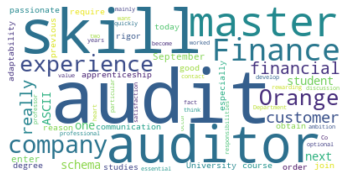

In [46]:
#@title Wordcloud  {display-mode: "form"}

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(raw_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 3. Your pitch's Sentiment Analysis 

---

Sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. 



In [47]:
#@title Your pitch's Sentiment Analysis {display-mode: "form"}
chart = alt.Chart(result_df).mark_bar().encode(x='metric', y='value', color='metric')
chart

alt.Chart(...)

The **Polarity** defines the phase of emotions expressed in the analyzed text. It ranges from -1 to 1 and goes like this: Very Positive, Positive, Neutral, Negative, Very Negative).

**Subjectivity** quantifies the amount of personal opinion and factual information contained in the text. It has values from 0 to 1. A value closer to 0 shows the sentence is objective and closer to 1 means that the text contains personal opinion rather than factual information. For the sake of this exercise, we consider 0.5 as the cutoff score: >0.5 Very Subjective; <0.5 Little Subjective.







In [48]:
#@title Your pitch's Polarity {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

if sentiment.polarity >= 0.5:
  print("Very Positive polarity 😀. Congratulations, you have done a good job on your pitch!!") 
elif sentiment.polarity > 0 < 0.5:
  print("Positive polarity 😀. The polarity of your pitch is adequate, but you can always improve it with more positive words!")
elif sentiment == 0:
  print("Neutral.polarity 😴. A little bit boring, maybe... You could improve your pitch by including some positive words on it.")
elif sentiment > -0.5 < 0:
  print ("Negative.polarity 😟. Your pitch is in a dangerous zone, because it is lacking some positive words on it. You could definitivelly improve it.")
elif sentiment <= -0.5:
  print("Very Negative.polarity 😟. Your pitch is in a dangerous zone, because it is lacking some positive words on it. You should definitivelly improve it.")


Positive polarity 😀. The polarity of your pitch is adequate, but you can always improve it with more positive words!


Consult the following list of Positive words to improve your pitch's polarity.

https://www.dictionary.com/learn/word-lists/writing/bcyhlTa1BVU 

In [49]:
#@title Your pitch's Subjectivity {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
if sentiment.subjectivity > 0.5:
  print("Very subjective 😀. Very good work, you got the point!!")
else:
  print("Little subjective 😴. As your pitch aims to sell yourself, some subjectivity is expected to get to know you better. Improve it by choosing some subjective words!")

Little subjective 😴. As your pitch aims to sell yourself, some subjectivity is expected to get to know you better. Improve it by choosing some subjective words!


Know more about Subjectivity in the articles below:

- Recognizing Objective and Subjective Language - 
http://content.nroc.org/DevelopmentalEnglish/unit05/Foundations/recognizing-objective-and-subjective-language.html 

- Objective and Subjective Word List - 
https://www.in.gov/fssa/ddrs/files/Objective-and-Subjective-Word-List.pdf 

## 4. Your Words Polarity Analysis

In [50]:
#@title Positive Words {display-mode: "form"}

token_sentiments['positives']


['join',
 0.296,
 'passionate',
 0.5267,
 'good',
 0.4404,
 'satisfaction',
 0.4404,
 'heart',
 0.6369,
 'rewarding',
 0.5267,
 'value',
 0.34]

Notice that positive words are your Soft Skills used in context.

In [51]:
#@title Negative Words {display-mode: "form"}

token_sentiments['negatives']

[]

Not all of the words on this list are truly negative in real life, but for the purposes of this exercise they will lower your score.

In [52]:
#@title Neutral Words {display-mode: "form"}

token_sentiments['neutral']

["I'm",
 "I'm",
 'in',
 'ASCII',
 'master,',
 'one',
 'student',
 'of',
 'schema',
 'as',
 'of',
 'next',
 'September',
 'I',
 'will',
 'enter',
 'an',
 'apprenticeship',
 'course',
 'in',
 'audit',
 'in',
 'order',
 'to',
 'obtain',
 'my',
 'Masters',
 'degree',
 'in',
 'audit',
 'and',
 'Finance',
 'and',
 'that',
 'the',
 'reason',
 'why',
 "I'm",
 'looking',
 'to',
 'your',
 'company',
 'today.',
 'I',
 'am',
 'about',
 'finance',
 'since',
 'my',
 'University',
 'studies,',
 'especially',
 'for',
 'audits',
 'which',
 'require',
 'very',
 'communication,',
 'skill,',
 'rigor',
 'and',
 'adaptability.',
 'During',
 'my',
 'previous',
 'professional',
 'experience',
 'with',
 'Orange,',
 'I',
 'develop',
 'skills',
 'that',
 'are',
 'essential',
 'to',
 'the',
 'financial',
 'auditor.',
 'I',
 'worked',
 'in',
 'fact',
 'during',
 'two',
 'years',
 'in',
 'the',
 'Department',
 'where',
 'customer',
 'is',
 'at',
 'the',
 'of',
 'Orange',
 'Co',
 'and',
 'through',
 'this',
 'I',
 '

Note that most of your technical skills will appear in this list. This means that while they are irrelevant to sentiment analysis, they will be relevant to other analyses, notably your adherence to the specific technical skills required by the job.

In [53]:
#@title Text Analyzer (NLP) {display-mode: "form"}


data_table.enable_dataframe_formatter()

tokens = text_analyzer(raw_text)
tokens

,Token,Shape,PoS,Tag,Lemma,IsAlpha,IsStopWords
0,I,X,PRON,PRP,-PRON-,True,True
1,'m,'x,AUX,VBP,be,False,True
2,I,X,PRON,PRP,-PRON-,True,True
3,'m,'x,AUX,VBP,be,False,True
4,in,xx,ADP,IN,in,True,True
...,...,...,...,...,...,...,...
176,value,xxxx,NOUN,NN,value,True,False
177,for,xxx,ADP,IN,for,True,True
178,your,xxxx,DET,PRP$,-PRON-,True,True
179,company,xxxx,NOUN,NN,company,True,False


# NLP Vocabulary

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, **tokens** can be either words, characters, or punctuation.

A **POS tag** (or part-of-speech tag) is a special label assigned to each token (word) in a text corpus to indicate the part of speech and often also other grammatical categories such as tense, number (plural/singular), case etc. More info: https://en.wikipedia.org/wiki/Part_of_speech.

The **lemma** is the form of the word  found in dictionaries, sometimes called the **base form**. Introducing lemmas makes it possible to treat different word forms of the word as the same word. 

**Stopwords** are those words that do not provide any useful information to decide in which category a text should be classified. This may be either because they don't have any meaning (prepositions, conjunctions, etc.) or because they are too frequent in the classification context.